In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ***Reading the data files***

In [ ]:
delhi_aqi_file = pd.read_csv('/content/Updated_Dataset_with_AQI (1).csv',index_col=0)
delhi_aqi_file.describe()

,pm25,pm10,o3,no2,so2,co,year,month,PM2.5_AQI,PM10_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
count,2512.000000,2491.000000,2486.000000,2479.000000,2443.000000,2480.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,187.619427,186.114412,16.835076,19.020976,5.916496,12.784677,2021.049980,6.493900,225.783548,245.606730,69.932188,18.097000,69.057139,292.879196
std,85.558149,121.448428,14.118048,12.561405,4.768729,7.823667,2.023158,3.476533,134.429674,111.932029,21.696898,11.814251,17.530591,102.082280
min,26.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,102.000000,6.000000,10.000000,2.000000,8.000000,2019.000000,3.000000,187.870390,189.000000,62.679245,10.979592,60.444444,223.661749
50%,164.000000,146.000000,13.000000,16.000000,5.000000,11.000000,2021.000000,7.000000,237.346681,234.000000,67.886792,13.000000,66.796296,271.762763
75%,223.000000,231.000000,24.000000,24.000000,9.000000,16.000000,2023.000000,10.000000,304.282282,307.000000,74.830189,28.344828,76.777778,359.181818
max,828.000000,979.000000,108.000000,98.000000,40.000000,75.000000,2025.000000,12.000000,499.399399,606.594203,348.739130,49.865772,211.030303,606.594203


# ***Data cleaning and Data processing***

In [ ]:
delhi_aqi_data = pd.DataFrame()
delhi_aqi_data[['date','pm25','pm10','o3','no2','so2','co','AQI']] = delhi_aqi_file[['date','pm25','pm10','o3','no2','so2','co','AQI']]

**Viewing the first five rows**

In [ ]:
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


**Viewing the last five rows**

In [ ]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


**calculating the size of the dataframe**

In [ ]:
delhi_aqi_data.shape

(2541, 8)

**Viewing the columns**

In [ ]:
delhi_aqi_data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI'], dtype='object')

Getting the information about the dataset

In [ ]:
delhi_aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 2540
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2541 non-null   object 
 1   pm25    2512 non-null   float64
 2   pm10    2491 non-null   float64
 3   o3      2486 non-null   float64
 4   no2     2479 non-null   float64
 5   so2     2443 non-null   float64
 6   co      2480 non-null   float64
 7   AQI     2541 non-null   float64
dtypes: float64(7), object(1)
memory usage: 178.7+ KB


Checking the missing values in the dataframe.

In [ ]:
delhi_aqi_data.isnull().sum()

,0
date,0
pm25,29
pm10,50
o3,55
no2,62
so2,98
co,61
AQI,0


There are some missing values in our dataframe which are represented as empty space/" ". We will find the count of these such values.

In [ ]:
delhi_aqi_data.isin([" "]).sum(axis=0)

,0
date,0
pm25,0
pm10,0
o3,0
no2,0
so2,0
co,0
AQI,0


**Handling the missing values**

Covert all empty spaces with NaN

and then insert the mean of that particular column to thos NaN values

In [ ]:
delhi_aqi_data = delhi_aqi_data.replace(to_replace = " ",value = np.nan)

In [ ]:
delhi_aqi_data.isnull().sum()

,0
date,0
pm25,29
pm10,50
o3,55
no2,62
so2,98
co,61
AQI,0


This shows the actual number of missing values as python only understand NaN values as missing values.

In [ ]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


From above we can see that every empty space value has been replaced by the NaN values. Now we will remove the mean

In [ ]:
delhi_aqi_data.iloc[:,1:] = delhi_aqi_data.iloc[:,1:].apply(pd.to_numeric)
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


In [ ]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


Calculating the mean of the dataframe and escaping the first column of the dataset as it is not an Integer value rather it is an string value.

In [ ]:
delhi_aqi_data.iloc[:,1:].mean()

,0
pm25,187.619427
pm10,186.114412
o3,16.835076
no2,19.020976
so2,5.916496
co,12.784677
AQI,292.879196


Replacing the missing values with mean values

In [ ]:
delhi_aqi_data = delhi_aqi_data.fillna(delhi_aqi_data.iloc[:,1:].mean())

In [ ]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.0
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.0
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.0
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,258.0
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,222.0


In [ ]:
delhi_aqi_data.isnull().sum()

,0
date,0
pm25,0
pm10,0
o3,0
no2,0
so2,0
co,0
AQI,0


In [ ]:
#delhi_aqi_file = pd.concat([delhi_aqi_file.iloc[[-1]],delhi_aqi_file.iloc[:-1]]).reset_index(drop=True)

In [ ]:
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


In [ ]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.0
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.0
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.0
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,258.0
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,222.0


In [ ]:
delhi_aqi_data

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.000000,151.0,30.0,22.0,1.0,14.000000,256.753754
1,2024-10-02,160.000000,161.0,35.0,22.0,3.0,13.000000,274.264264
2,2024-10-03,198.000000,158.0,31.0,20.0,3.0,13.000000,369.321321
3,2024-10-04,141.000000,129.0,32.0,17.0,2.0,11.000000,240.504742
4,2024-10-05,112.000000,127.0,28.0,14.0,3.0,8.000000,227.000000
...,...,...,...,...,...,...,...,...
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.000000
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.000000
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.000000


In [ ]:
delhi_aqi_data['Date'] = pd.to_datetime(delhi_aqi_data['date'], format = '%Y-%m-%d')

In [ ]:
delhi_aqi_file = delhi_aqi_data.sort_values(by = 'Date', ascending=True)

In [ ]:
delhi_aqi_data

,date,pm25,pm10,o3,no2,so2,co,AQI,Date
Unnamed: 0,,,,,,,,,
0,2024-10-01,153.000000,151.0,30.0,22.0,1.0,14.000000,256.753754,2024-10-01
1,2024-10-02,160.000000,161.0,35.0,22.0,3.0,13.000000,274.264264,2024-10-02
2,2024-10-03,198.000000,158.0,31.0,20.0,3.0,13.000000,369.321321,2024-10-03
3,2024-10-04,141.000000,129.0,32.0,17.0,2.0,11.000000,240.504742,2024-10-04
4,2024-10-05,112.000000,127.0,28.0,14.0,3.0,8.000000,227.000000,2024-10-05
...,...,...,...,...,...,...,...,...,...
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.000000,2024-09-20
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.000000,2020-09-01
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.000000,2020-09-06


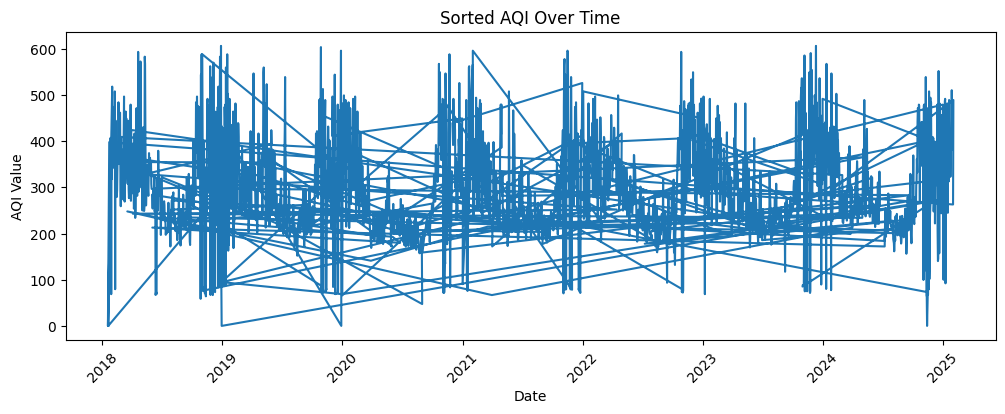

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(delhi_aqi_data['Date'], delhi_aqi_data['AQI'], label='AQI')  # X=Date, Y=AQI
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.title('Sorted AQI Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Earliest date:", delhi_aqi_data['Date'].min())
print("Latest date:", delhi_aqi_data['Date'].max())

Earliest date: 2018-01-18 00:00:00
Latest date: 2025-02-02 00:00:00


In [ ]:
delhi_aqi_data.describe()

,pm25,pm10,o3,no2,so2,co,AQI,Date
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541
mean,187.619427,186.114412,16.835076,19.020976,5.916496,12.784677,292.879196,2021-07-19 02:30:44.628099072
min,26.000000,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-01-18 00:00:00
25%,131.000000,102.000000,6.000000,10.000000,2.000000,8.000000,223.661749,2019-10-16 00:00:00
50%,164.000000,148.000000,14.000000,17.000000,5.000000,11.000000,271.762763,2021-07-19 00:00:00
75%,222.000000,228.000000,24.000000,24.000000,9.000000,16.000000,359.181818,2023-04-15 00:00:00
max,828.000000,979.000000,108.000000,98.000000,40.000000,75.000000,606.594203,2025-02-02 00:00:00
std,85.068324,120.247128,13.964358,12.407150,4.675828,7.729151,102.082280,NaN


# **Define Features & Target**

In [ ]:
features = delhi_aqi_data[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].values
target = delhi_aqi_data['AQI'].values

In [ ]:
# Normalize data (critical for neural networks)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
# Split into sequences (time-series format)
def create_sequences(features, target, window_size=24):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i+window_size, :])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
window_size = 24  # Adjust based on your data frequency (e.g., 24 hours)
X, y = create_sequences(scaled_features, scaled_target, window_size)

In [ ]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build CNN-LSTM Hybrid Model
model = Sequential()

In [ ]:
# CNN Layers for spatial feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# LSTM Layers for temporal dependencies
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
# Output layer
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mse'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.2584 - mse: 0.1070 - val_loss: 0.1137 - val_mse: 0.0192
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1440 - mse: 0.0375 - val_loss: 0.0758 - val_mse: 0.0113
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1393 - mse: 0.0351 - val_loss: 0.0841 - val_mse: 0.0122
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1413 - mse: 0.0349 - val_loss: 0.0760 - val_mse: 0.0112
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1425 - mse: 0.0355 - val_loss: 0.0898 - val_mse: 0.0130
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1377 - mse: 0.0343 - val_loss: 0.0986 - val_mse: 0.0147
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1401 - mse: 0.0347 - val_loss: 0.1052 - val_mse: 0.0160


In [ ]:
# Evaluate on test data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_loss:.2f}, Test MSE: {test_mse:.2f}")

Test MAE: 0.10, Test MSE: 0.01


In [ ]:
# Predict AQI
sample_input = X_test[0].reshape(1, window_size, 6)
predicted_aqi = model.predict(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [ ]:
# Inverse transform to original scale
predicted_aqi = scaler.inverse_transform(predicted_aqi)
print(f"Predicted AQI: {predicted_aqi[0][0]:.2f}")

Predicted AQI: 278.73


In [ ]:
predicted_aqi

array([[278.7273]], dtype=float32)

In [ ]:
# Assuming your data is sorted chronologically
latest_sequence = scaled_features[-window_size:]  # Last 'window_size' steps
future_steps = 7  # Predict next 7 days (adjust as needed)

In [ ]:
future_predictions = []

for _ in range(future_steps):
    # Reshape input for the model (batch_size, window_size, features)
    input_seq = latest_sequence.reshape(1, window_size, 6)

    # Predict next AQI (scaled value)
    next_pred = model.predict(input_seq, verbose=0)[0][0]
    future_predictions.append(next_pred)

    # Update the sequence: remove oldest, add the new prediction
    latest_sequence = np.roll(latest_sequence, -1, axis=0)
    latest_sequence[-1] = next_pred  # Replace with predicted value

# Inverse-transform predictions to original AQI scale
future_aqi = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [ ]:
last_date = delhi_aqi_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

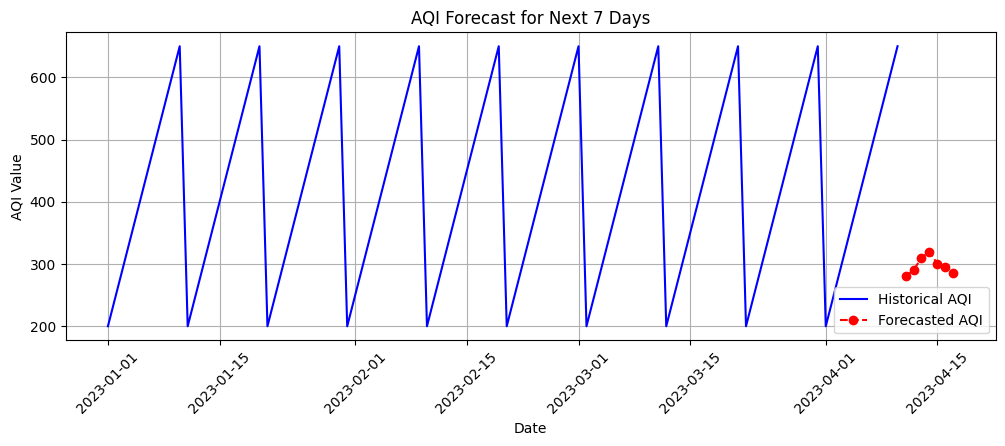

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
historical_dates = pd.date_range(start="2023-01-01", periods=100)  # Historical dates
historical_aqi = [200 + 50 * (i % 10) for i in range(100)]         # Historical AQI values

future_dates = pd.date_range(start=historical_dates[-1] + pd.Timedelta(days=1), periods=7)  # Next 7 days
forecasted_aqi = [280, 290, 310, 320, 300, 295, 285]              # Forecasted AQI values

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(historical_dates, historical_aqi, 'b-', label='Historical AQI')
plt.plot(future_dates, forecasted_aqi, 'ro--', label='Forecasted AQI')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.title('AQI Forecast for Next 7 Days')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

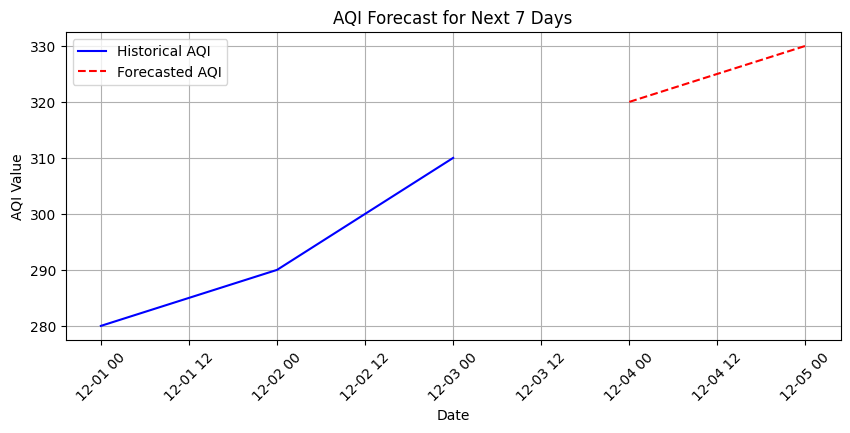

In [ ]:
import matplotlib.pyplot as plt

# Sample Data
historical_dates = ["2023-12-01", "2023-12-02", "2023-12-03"]  # Past dates
historical_aqi = [280, 290, 310]                                # Historical AQI values
forecast_dates = ["2023-12-04", "2023-12-05"]                   # Future dates
forecast_aqi = [320, 330]                                       # Forecasted AQI values

# Convert dates to datetime objects
historical_dates = pd.to_datetime(historical_dates)
forecast_dates = pd.to_datetime(forecast_dates)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(historical_dates, historical_aqi, "b-", label="Historical AQI")
plt.plot(forecast_dates, forecast_aqi, "r--", label="Forecasted AQI")
plt.xlabel("Date")
plt.ylabel("AQI Value")
plt.title("AQI Forecast for Next 7 Days")
plt.xticks(rotation=45)
plt.legend()  # Add legend here
plt.grid(True)
plt.show()